In [1]:
import matplotlib.pyplot as plt

def build_dots(xs, ys):
    plt.plot(xs, ys, 'r')
    plt.grid()
    plt.show()

## Basic approximation funcs

In [2]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

def exponent(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.exp(b*x))
    return res

def ln(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.log(x, math.exp(1)) + b)
    return res

def power(xs, a, b):
    res = []
    for x in xs:
        res.append(a*pow(x, b))
    return res

## Sums and eps

In [3]:
def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return sxx(eps)

def square_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

In [34]:
def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

# a3, a2, a1
def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), sx(xs), sxx(xs)],
                     [sx(xs), sxx(xs), pow_n(xs, 3)],
                     [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def exponent_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    b, a = linear_approximation(xs, new_y)
    a = math.exp(a)
    return (a, b)

def power_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    b, a = linear_approximation(new_x, new_y)
    a = math.exp(a)
    return (a, b)

def logarithmic_approximation(xs, ys):
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    return linear_approximation(new_x, ys)

In [32]:
import time
from termcolor import cprint

def read_from_file(filename):
    try:
        file = open(filename, 'r')
    except:
        cprint("I don`t see such file. Take another try, Anon, and be more careful", 'red')
        return (None, None)
    try:
        xs = list(map(float, file.readline().split(' ')))
        ys = list(map(float, file.readline().split(' ')))
        file.close()
    except:
        cprint("Anon, please, check your file before you bring it here", 'red')
        file.close()
        return (None, None)
    return (xs, ys)

def get_data(xs = None, ys = None, first_time = False):
    if (first_time):
        print("Okay then\nYou are here to approximate some functions, aren't you?")
        time.sleep(1)
        print("So, no time to lose")
        time.sleep(1)
        
    if (xs is None):
        print("Do you have some file with data?")
        ans = input()
        if ans == "yes" or ans == "Y" or ans == "y":
            print("Good... So, what the file?")
            filename = input()
            xs, ys = read_from_file(filename)
            if xs == None:
                return get_data(None, None, False)
            return (xs, ys)
    
        print("Okay, just type some x's for starters:")
        xs = input().split()
        try:
            for i in range(len(xs)):
                xs[i] = float(xs[i])
        except:
            cprint("Didn't you know that values should be represented as floats?", 'red')
            time.sleep(1)
            print("Lets try again...")
            get_data()


    print("Next, enter y's. I hope it isn't just random numbers...")
    ys = input().split()
    try:
        for i in range(len(ys)):
            ys[i] = float(ys[i])
    except:
        cprint("Didn't you know that values should be represented as floats?", 'red')
        time.sleep(1)
        print("Lets try again...")
        get_data(xs)
    return (xs, ys)

Okay then
You are here to approximate some functions, aren't you?
So, no time to lose
Do you have some file with data?
y
Good... So, what the file?
variant13.txt

Okay, here is your data:
x: [2.0, 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9.0];
y:[0.22, 1.11, 2.23, 3.34, 4.45, 5.27, 6.41, 7.34, 8.47, 9.5, 10.23]

Now we are finally ready to start
Give me a minute...

You can get your results, Anon

---------------Linear approximation---------------
phi(x) = 1.458x + -2.696
S = 0.106


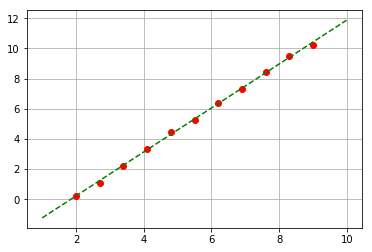

---------------Square approximation---------------
phi(x) = -0.011x^2 + 1.584x + -2.986
S = 0.079


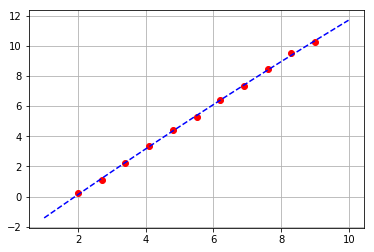

---------------Exponent approximation---------------
phi(x) = 0.33 * e^(0.438x)
S = 66.554


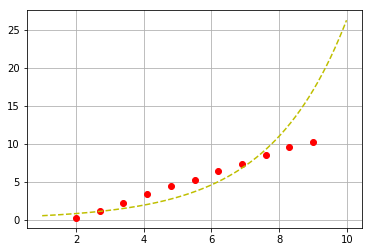

---------------Logarithm approximation---------------
phi(x) = 6.86 + -5.708ln(x)
S = 4.355


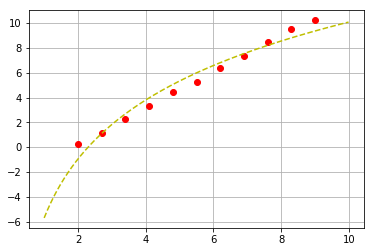

---------------Power approximation---------------
phi(x) = 0.095 * x^2.273
S = 23.591


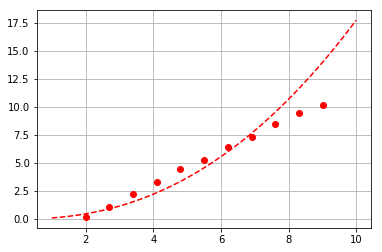

Are you ready to face the best approximation function for your data?
You, actually, don`t have a choise, just press any button to continue...

Square approximation is your bro, bro
+-----+-------+--------+--------+----------+-----------+--------+
|  X  |   Y   | Linear | Square | Exponent | Logarithm | Power  |
+-----+-------+--------+--------+----------+-----------+--------+
| 2.0 |  0.22 |  0.22  | 0.136  |  0.7933  |   -0.954  | 0.459  |
| 2.7 |  1.11 | 1.241  | 1.208  |  1.078   |   1.105   | 0.908  |
| 3.4 |  2.23 | 2.262  | 2.268  |  1.4648  |   2.686   | 1.533  |
| 4.1 |  3.34 | 3.283  | 3.317  |  1.9904  |    3.97   | 2.347  |
| 4.8 |  4.45 | 4.304  | 4.354  |  2.7046  |   5.052   | 3.358  |
| 5.5 |  5.27 | 5.325  | 5.381  |  3.6751  |   5.986   | 4.575  |
| 6.2 |  6.41 | 6.345  | 6.396  |  4.9939  |   6.807   | 6.006  |
| 6.9 |  7.34 | 7.366  |  7.4   |  6.7858  |   7.541   | 7.659  |
| 7.6 |  8.47 | 8.387  | 8.393  |  9.2207  |   8.204   |  9.54  |
| 8.3 |  9.5  | 9.408  | 9.

In [35]:
import numpy as np
from prettytable import PrettyTable
import datetime

xs, ys = get_data(None, None, True)

print("\nOkay, here is your data:")
print(f"x: {xs};\ny:{ys}")
print("\nNow we are finally ready to start\nGive me a minute...")

plot_x = np.array(np.arange(xs[0] - 1, xs[len(xs) - 1] + 1, step = 0.01))

results = []
standart_deviations = []
print("\nYou can get your results, Anon")

print("\n---------------Linear approximation---------------")

linear_c = linear_approximation(xs, ys)
ys_linear = linear(xs, linear_c[0], linear_c[1])
results.append(square_deviation(epsilon(ys, ys_linear)))
standart_deviations.append(standard_deviation(epsilon(ys, ys_linear)))

print(f"phi(x) = {round(linear_c[0], 3)}x + {round(linear_c[1], 3)}")
print(f"S = {round(standard_deviation(epsilon(ys, ys_linear)), 3)}")
plt.plot(xs, ys, 'ro',
         plot_x, linear(plot_x, linear_c[0], linear_c[1]), 'g--')
plt.grid()
plt.show()

print("---------------Square approximation---------------")

square_c = square_approximation(xs, ys)
ys_square = polynomial_second_degree(xs, square_c[2], square_c[1], square_c[0])
results.append(square_deviation(epsilon(ys, ys_square)))
standart_deviations.append(standard_deviation(epsilon(ys, ys_square)))

print(f"phi(x) = {round(square_c[2], 3)}x^2 + {round(square_c[1], 3)}x + {round(square_c[0], 3)}")
print(f"S = {round(standard_deviation(epsilon(ys, ys_square)), 3)}")
plt.plot(xs, ys, 'ro',
         plot_x, polynomial_second_degree(plot_x, square_c[2], square_c[1], square_c[0]), 'b--')
plt.grid()
plt.show()

print("---------------Exponent approximation---------------")

exponent_c = exponent_approximation(xs, ys)
ys_exponent = exponent(xs, exponent_c[0], exponent_c[1])
results.append(square_deviation(epsilon(ys, ys_exponent)))
standart_deviations.append(standard_deviation(epsilon(ys, ys_exponent)))

print(f"phi(x) = {round(exponent_c[0], 3)} * e^({round(exponent_c[1], 3)}x)")
print(f"S = {round(standard_deviation(epsilon(ys, ys_exponent)), 3)}")
plt.plot(xs, ys, 'ro',
         plot_x, exponent(plot_x, exponent_c[0], exponent_c[1]), 'y--')
plt.grid()
plt.show()

print("---------------Logarithm approximation---------------")

logarithm_c = logarithmic_approximation(xs, ys)
ys_logarithm = ln(xs, logarithm_c[0], logarithm_c[1])
results.append(square_deviation(epsilon(ys, ys_logarithm)))
standart_deviations.append(standard_deviation(epsilon(ys, ys_logarithm)))

print(f"phi(x) = {round(logarithm_c[0], 3)} + {round(logarithm_c[1], 3)}ln(x)")
print(f"S = {round(standard_deviation(epsilon(ys, ys_logarithm)), 3)}")
plt.plot(xs, ys, 'ro',
         plot_x, ln(plot_x, logarithm_c[0], logarithm_c[1]), 'y--')
plt.grid()
plt.show()

print("---------------Power approximation---------------")

power_c = power_approximation(xs, ys)
ys_power = power(xs, power_c[0], power_c[1])
results.append(square_deviation(epsilon(ys, ys_power)))
standart_deviations.append(standard_deviation(epsilon(ys, ys_power)))

print(f"phi(x) = {round(power_c[0], 3)} * x^{round(power_c[1], 3)}")
print(f"S = {round(standard_deviation(epsilon(ys, ys_power)), 3)}")
plt.plot(xs, ys, 'ro',
         plot_x, power(plot_x, power_c[0], power_c[1]), 'r--')
plt.grid()
plt.show()

print("Are you ready to face the best approximation function for your data?")
print("You, actually, don`t have a choise, just press any button to continue...")
input()

best = min(results)

for i in range(len(results)):
    if best == results[i]:
        if i == 0:
            cprint("Linear approximation is the best!", 'green')
        elif i == 1:
            cprint("Square approximation is your bro, bro", 'green')
        elif i == 2:
            cprint("Exponent approximation rulez!", 'green')
        elif i == 3:
            cprint("There is some power in power approximation!", 'green')
        elif i == 4:
            cprint("Logarithm saved this day!", 'green')
            
table = PrettyTable()
table.field_names = ["X", "Y", "Linear", "Square", "Exponent", "Logarithm", "Power"]
for i in range(len(xs)):
    table.add_row([xs[i], ys[i], round(ys_linear[i], 3), round(ys_square[i], 3), round(ys_exponent[i], 4), round(ys_logarithm[i], 3), round(ys_power[i], 3)])
table.add_row(['--', 'S'] + [round(standart_deviations[i], 3) for i in range(len(standart_deviations))])
table.add_row(['--', 'δ'] + [round(results[i], 3) for i in range(len(results))])
table.add_row(['--', 'a', round(linear_c[0], 3), round(square_c[2], 3), round(exponent_c[0], 3), round(logarithm_c[0], 3), round(power_c[0], 3)])
table.add_row(['--', 'b', round(linear_c[1], 3), round(square_c[1], 3), round(exponent_c[1], 3), round(logarithm_c[1], 3), round(power_c[1], 3)])
table.add_row(['--', 'c', '--', round(square_c[0], 3), '--', '--', '--'])
print(str(table))
print("Do you want to save result table to some file?")
ans = input()
if ans == "yes" or ans == "Y" or ans == "y":
    print("Hmm, then I need to know filename")
    filename = input()
    file = open(filename, 'a')
    file.write(f"--{datetime.datetime.now()}--")
    file.write(f"\n{str(table)}\n")
    file.close()
    cprint(f"Succesfully writen to '{filename}'", 'green')